In [59]:
import yfinance as yf
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, month_plot, quarter_plot
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
import pickle

## 1) Importing Data 

In [60]:
sp500=yf.download('^NSEI',start="2011-01-01", end="2015-12-31",interval='1d')

[*********************100%***********************]  1 of 1 completed


In [61]:
sp500.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-01-03,6177.450195,6178.549805,6147.200195,6157.600098,6157.600098,0
2011-01-04,6172.750000,6181.049805,6124.399902,6146.350098,6146.350098,0
2011-01-05,6141.350098,6141.350098,6062.350098,6079.799805,6079.799805,0
2011-01-06,6107.000000,6116.149902,6022.299805,6048.250000,6048.250000,0
2011-01-07,6030.899902,6051.200195,5883.600098,5904.600098,5904.600098,0


In [62]:
sp500['Returns %']=sp500['Adj Close'].diff() / sp500['Adj Close']

In [63]:
sp500.head()

,Open,High,Low,Close,Adj Close,Volume,Returns %
Date,,,,,,,
2011-01-03,6177.450195,6178.549805,6147.200195,6157.600098,6157.600098,0,NaN
2011-01-04,6172.750000,6181.049805,6124.399902,6146.350098,6146.350098,0,-0.001830
2011-01-05,6141.350098,6141.350098,6062.350098,6079.799805,6079.799805,0,-0.010946
2011-01-06,6107.000000,6116.149902,6022.299805,6048.250000,6048.250000,0,-0.005216
2011-01-07,6030.899902,6051.200195,5883.600098,5904.600098,5904.600098,0,-0.024328


<AxesSubplot:xlabel='Date'>

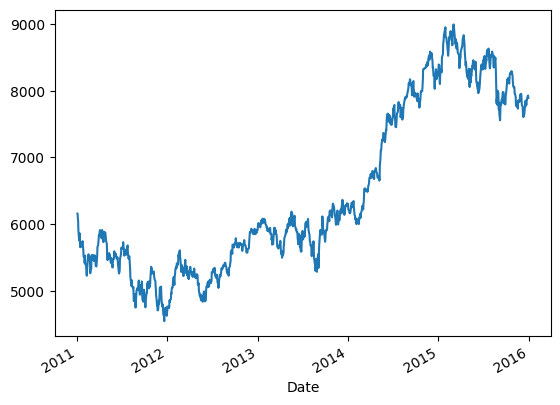

In [64]:
sp500['Adj Close'].plot()

<AxesSubplot:xlabel='Date'>

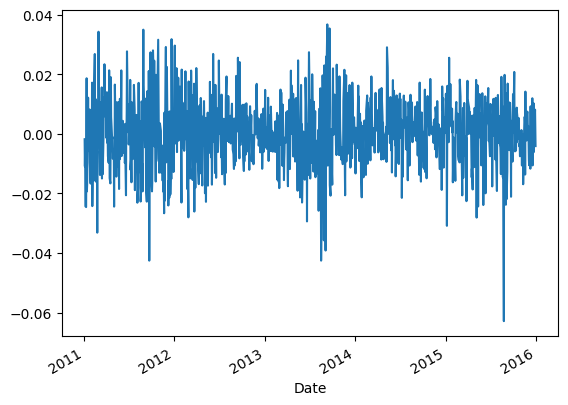

In [65]:
sp500['Returns %'].plot()

In [66]:
# sp500['Adj Close'].ewm(span=100).mean().plot()

In [67]:
# sp500['Adj Close']=sp500['Adj Close'].ewm(span=80).mean()

<AxesSubplot:xlabel='Date'>

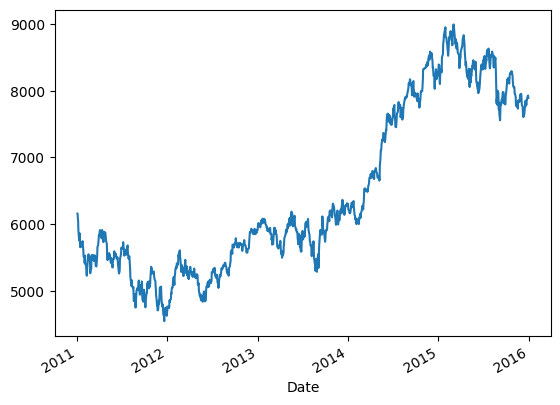

In [68]:
sp500['Adj Close'].plot()

The cyclical component represents phenomena that happen across seasonal periods. Cyclical patterns do not have a fixed period like seasonal patterns do. An example of a cyclical pattern is the cycles of boom and bust that stock markets experience in response to world events. <br>
This data seems to have cyclical component with no consistent cyclicity. So instead of decomposing it into trend, seasonality, noise, we would just keep it as it is.

In [69]:
sp500['Adj Close'].shape

(1214,)

Figure(640x480)


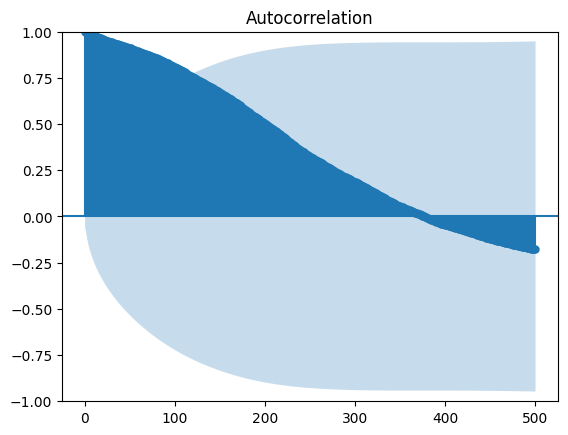

In [70]:
print(plot_acf(sp500['Adj Close'],lags=500))

Also autocorrelation graph shows no seasonal pattern.

## 2) Decomposition of Data 

In [71]:
sp500_decomposition = seasonal_decompose(x=sp500['Adj Close'], model='additive', period=45)

### 2.1) Trend 

<AxesSubplot:xlabel='Date'>

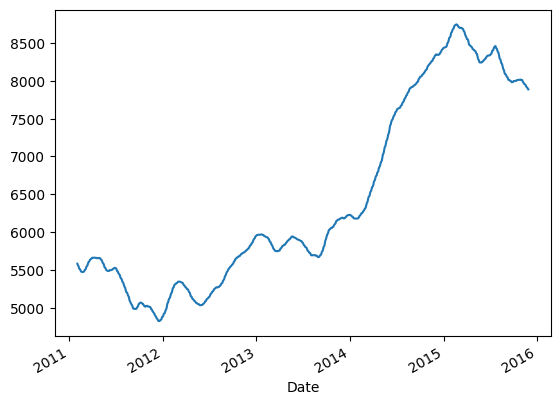

In [72]:
sp500_decomposition.trend.plot()

### 2.2) Seasonal 

<AxesSubplot:xlabel='Date'>

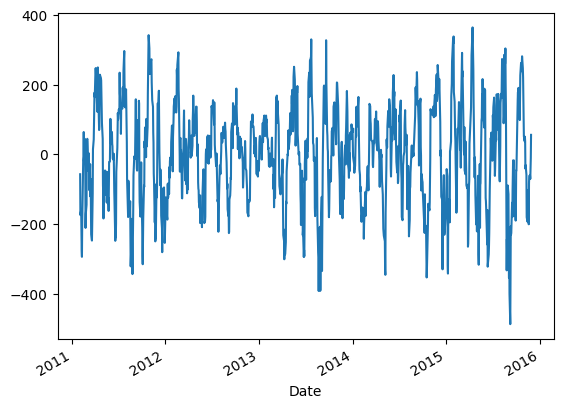

In [73]:
(sp500_decomposition.seasonal+sp500_decomposition.resid).plot()

<AxesSubplot:xlabel='Date'>

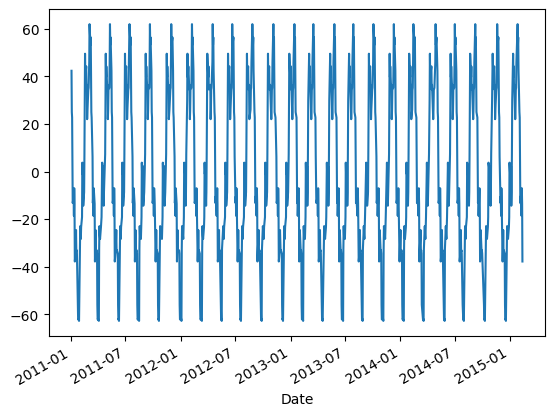

In [74]:
sp500_decomposition.seasonal[:1000].plot()

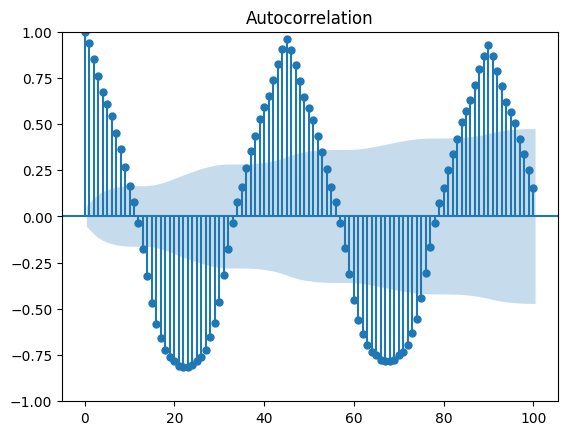

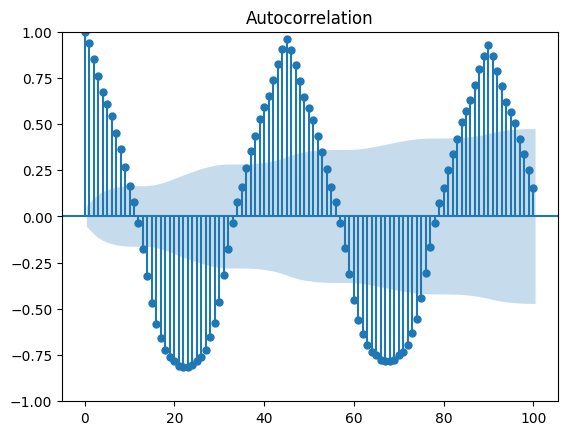

In [75]:
plot_acf(sp500_decomposition.seasonal,lags=100)

### 2.3) Residual 

<AxesSubplot:xlabel='Date'>

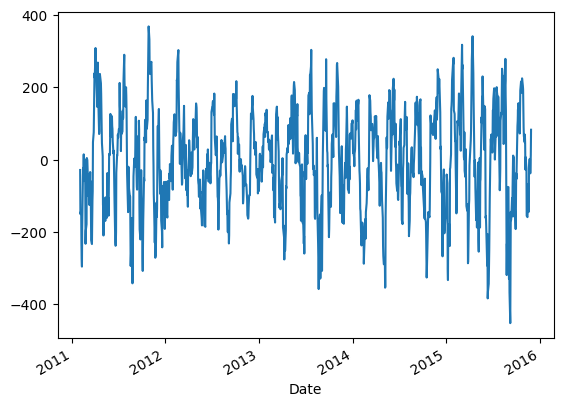

In [76]:
sp500_decomposition.resid.dropna().plot()

## 3) Stationarity Test

<AxesSubplot:xlabel='Date'>

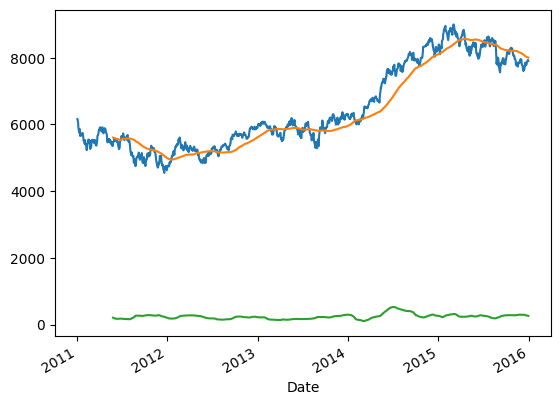

In [77]:
sp500['Adj Close'].plot()
sp500['Adj Close'].rolling(100).mean().plot()
sp500['Adj Close'].rolling(100).std().plot()

### 3.1) Constant Mean Test

In [78]:
# difference between max and min mean
( sp500['Adj Close'].rolling(500).mean().max() - sp500['Adj Close'].rolling(500).mean().min() ) * 100 / sp500['Adj Close'].rolling(500).mean().max()
# The mean appears to be constant considering the value of mean, since the difference between minimum and max is about 17% from it's max value

31.015293917150736

In [79]:
# chunks = np.split(monthly_temp.temp, indices_or_sections=12)

### 3.2) Constant Std Test

In [80]:
# difference between max and min mean
( sp500['Adj Close'].rolling(500).std().max() - sp500['Adj Close'].rolling(500).std().min() ) * 100 / sp500['Adj Close'].rolling(500).std().max()
# the standard deviation is not constant

69.2860019682495

### 3.3) Dickey Fuller Test 

In [81]:
adf_sp500, pvalue_sp500, usedlag_, nobs_, critical_values_sp500, icbest_ = adfuller(sp500['Adj Close'])
pvalue_sp500

0.8544054963370226

The pvalue of dickey fuller should be below 0.05. <br>
The next dickey fuller test would be conducted on a data after removing autocorrelation with differencing. 

In [82]:
sp500_diff=sp500['Adj Close'].diff(periods=1)[~np.isnan(sp500['Adj Close'].diff(periods=1))]
adf_sp500_diff, pvalue_sp500_diff, usedlag_diff, nobs_diff, critical_values_sp500, icbest_diff = adfuller(sp500_diff)
pvalue_sp500_diff

0.0

In [83]:
sp500_log_diff=np.log(sp500.loc[~np.isnan(np.array(sp500['Returns %'])),'Returns %']+1)
adf_sp500_log_diff, pvalue_sp500_log_diff, usedlag_log_diff, nobs_log_diff, critical_values_sp500, icbest_log_diff = adfuller(sp500_diff)
pvalue_sp500_log_diff

0.0

The value is lower than 0.05 so, the stationary test is passed.

<AxesSubplot:xlabel='Date'>

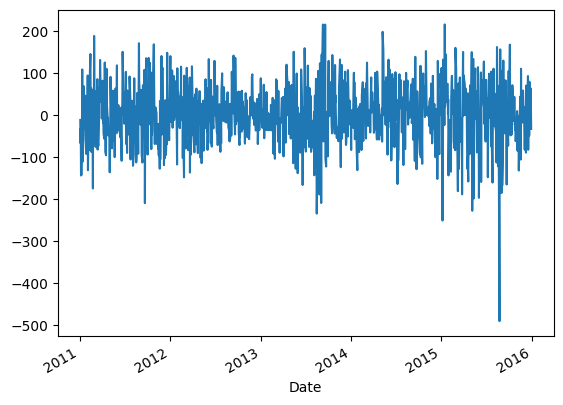

In [84]:
sp500_diff.plot()

### 3.4) Autocorrelation Tests 

Figure(640x480)
Figure(640x480)


C:\Users\hp\miniconda3\envs\kirtesh\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


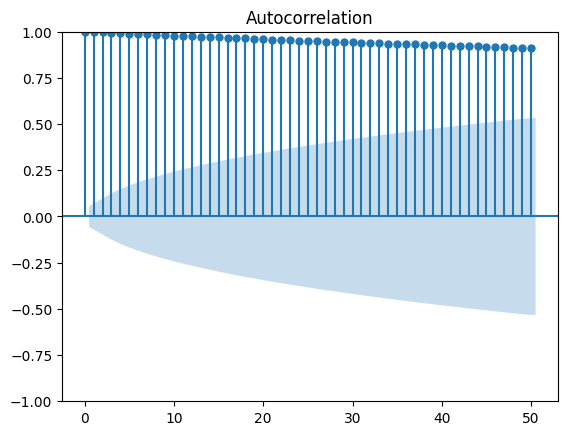

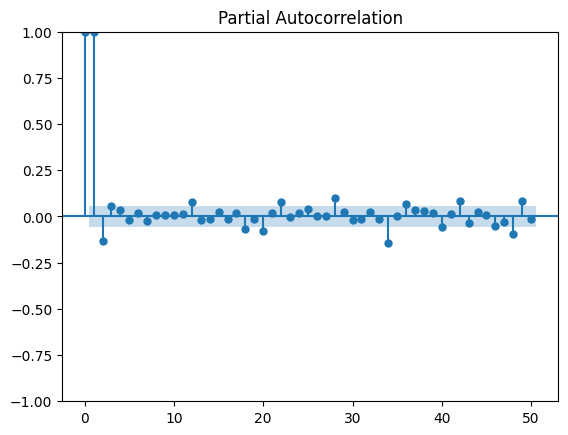

In [85]:
print(plot_acf(sp500['Adj Close'],lags=50))
print(plot_pacf(sp500['Adj Close'],lags=50))

In [86]:
# log difference data

Figure(640x480)
Figure(640x480)


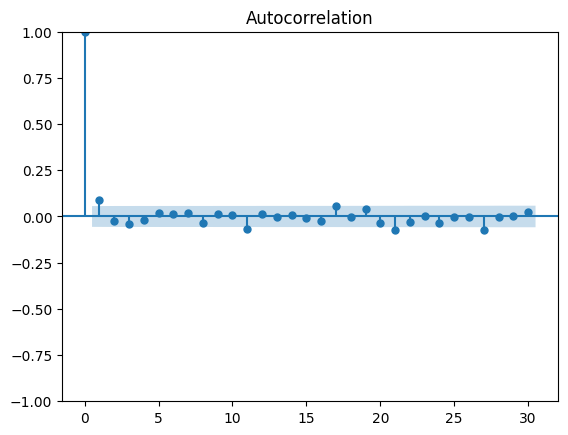

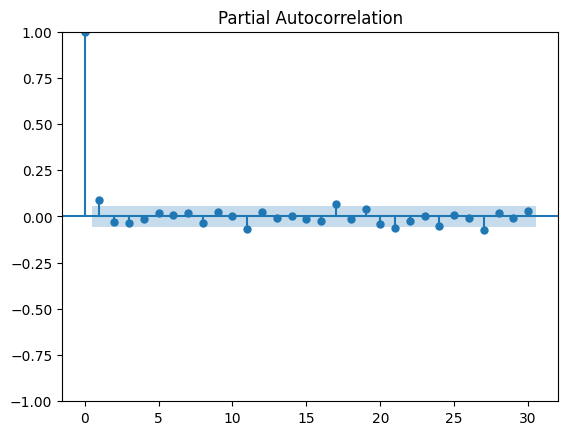

In [87]:
print(plot_acf(np.log(sp500.loc[~np.isnan(np.array(sp500['Returns %'])),'Returns %']+1),lags=30))
print(plot_pacf(np.log(sp500.loc[~np.isnan(np.array(sp500['Returns %'])),'Returns %']+1),lags=30))